In [1]:
import pandas as pd
import numpy as np
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
def calculate_rmse(y_true, y_pred):
            return np.sqrt(np.mean((y_pred - y_true) ** 2))

def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
def sarimax(train):
    files = ['fpt', 'cmg', 'elc']
    for file in files:
        # Load the dataset
        df = pd.read_csv(f'../../IS403_O21_14/Dataset/{file}_data_final.csv', index_col='Date')
        df.index = pd.to_datetime(df.index)

        # Calculate the index for the train-test split
        split_index = int(len(df) * train)
        train_data = df.iloc[:split_index]
        test_data = df.iloc[split_index:]


        # Fit the Auto ARIMA model on the training data
        model = pm.auto_arima(train_data['Price'], 
                              seasonal=True, 
                              m=12, 
                              suppress_warnings=True,
                              verbose=True)
        # print("Auto ARIMA Model Summary")
        # print(model.summary())

        # Extract the optimal parameters from the auto_arima model
        order = model.order
        seasonal_order = model.seasonal_order

        # Fit the SARIMAX model on the training data
        sarimax_model = SARIMAX(train_data['Price'], 
                                order=order, 
                                seasonal_order=seasonal_order, 
                                enforce_stationarity=False, 
                                enforce_invertibility=False)
        sarimax_results = sarimax_model.fit(disp=False)
        # print("SARIMAX Model Summary")
        # print(sarimax_results.summary())

        print("Begin Forecasting")

        forecast = sarimax_results.predict(start=test_data.index[0], end=test_data.index[-1])

        df = forecast.reset_index()
        df = df.rename(columns={'index': 'Date', 'predicted_mean': 'Price'}).set_index('Date')

        df.sort_index(inplace=True, ascending=True)

        y_pred = df['Price']

        # Calculate RMSE
        rmse = calculate_rmse(test_data['Price'], y_pred)
        print(f'RMSE {file.upper()}:', rmse)

        # Calculate MAE
        mae = calculate_mae(test_data['Price'], y_pred)
        print(f'MAE {file.upper()}:', mae)

        # Calculate MAPE
        mape = calculate_mape(test_data['Price'], y_pred)
        print(f'MAPE {file.upper()}:', mape)


        forecast_90days = sarimax_results.predict(start=test_data.index[-1]+ pd.Timedelta(days=1) , end=test_data.index[-1] + pd.Timedelta(days=90))

        df90 = forecast_90days.reset_index()
        df90 = df90.rename(columns={'index': 'Date', 'predicted_mean': 'Price'}).set_index('Date')

        df90.sort_index(inplace=True, ascending=True)

        y_pred30 = df90['Price'][:30]

        plt.plot(train_data.index, train_data['Price'])
        plt.plot(test_data.index, test_data['Price'])
        plt.plot(test_data.index, y_pred)
        plt.plot(df90.index[:30], df90['Price'][:30])
        plt.plot(df90.index[30:60], df90['Price'][30:60])
        plt.plot(df90.index[60:90], df90['Price'][60:90])


        plt.legend(['Train', 'Test', 'Predictions', 'Predict30days', 'Predict60days', 'Predict90days'])
        plt.title(f'{file.upper()} - SARIMAX Predictions')
        plt.show()

/home/toilacube/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/toilacube/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/toilacube/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Begin Forecasting
RMSE FPT: 30607.195869364903
MAE FPT: 24319.02310440078
MAPE FPT: 23.513395652291173


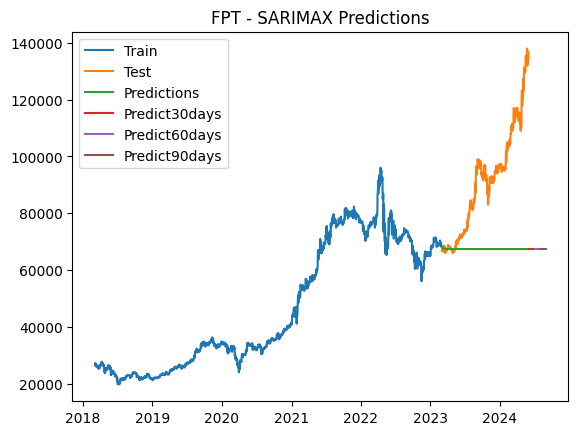

/home/toilacube/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/toilacube/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Begin Forecasting
RMSE CMG: 9388.335906953362
MAE CMG: 7125.047528076355
MAPE CMG: 16.589563013832716


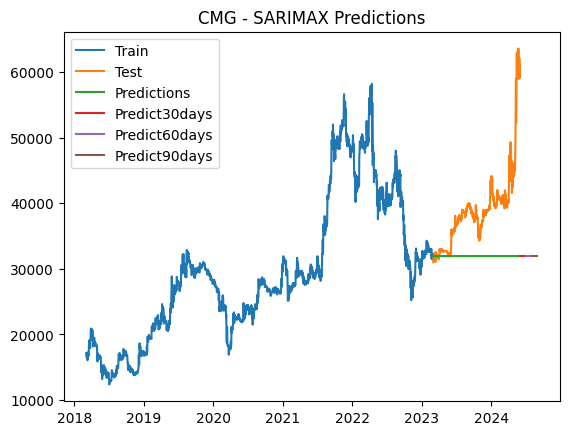

/home/toilacube/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/toilacube/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Begin Forecasting
RMSE ELC: 9258.091001405384
MAE ELC: 7470.671811579263
MAPE ELC: 38.09482969005831


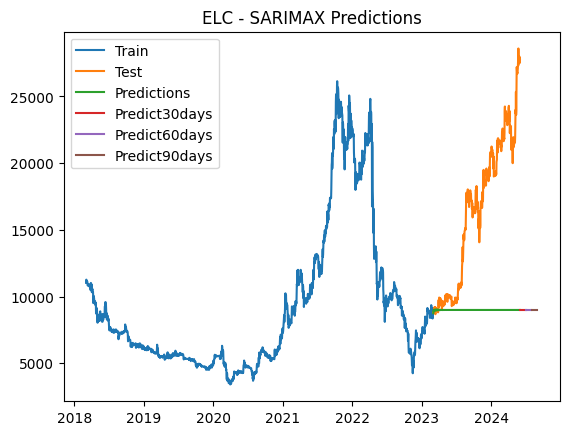

In [4]:
sarimax(0.8)

/home/toilacube/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/toilacube/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/toilacube/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Begin Forecasting
RMSE FPT: 16007.850902436676
MAE FPT: 11858.071400475905
MAPE FPT: 10.315252619969025


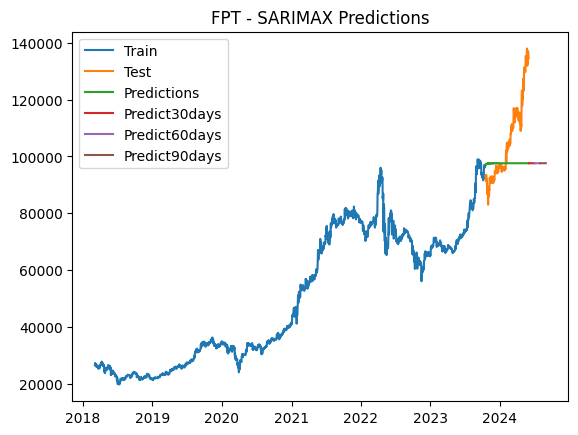

/home/toilacube/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/toilacube/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Begin Forecasting
RMSE CMG: 7780.765427544718
MAE CMG: 4739.422314851573
MAPE CMG: 9.666955378560575


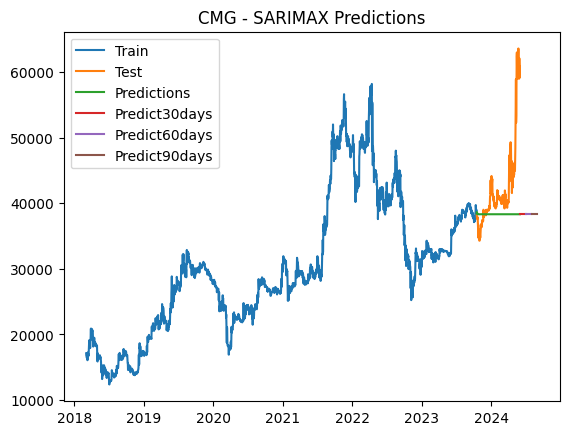

/home/toilacube/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/toilacube/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Begin Forecasting
RMSE ELC: 3922.861350914141
MAE ELC: 3150.6021159341517
MAPE ELC: 14.131968296532275


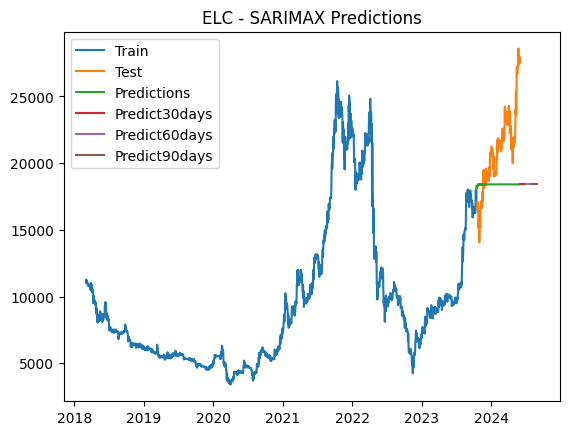

In [5]:
sarimax(0.9)

/home/toilacube/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/toilacube/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/toilacube/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Begin Forecasting
RMSE FPT: 23809.709647762076
MAE FPT: 16389.347032351143
MAPE FPT: 16.478613417802332


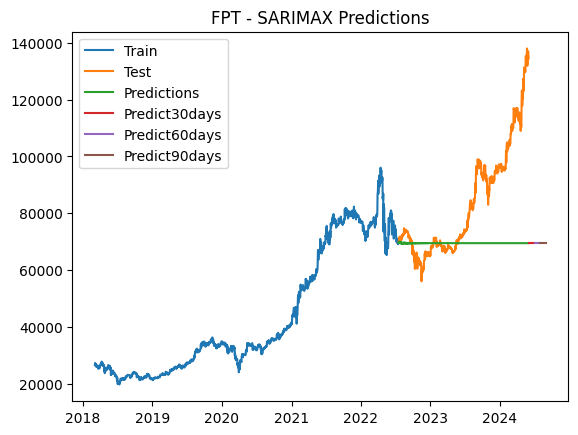

KeyboardInterrupt: 

In [6]:
sarimax(0.7)